In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import os, sys

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Download mnist

In [2]:
dataset_dir = "dataset/mnist"
if os.path.exists(dataset_dir) is False:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    os.makedirs(dataset_dir)
    np.save(dataset_dir+"/x_train.npy", x_train)
    np.save(dataset_dir+"/y_train.npy", y_train)
    np.save(dataset_dir+"/x_test.npy", x_test)
    np.save(dataset_dir+"/y_test.npy", x_test)
    print("saved npys")
else:
    x_train = np.load(dataset_dir+"/x_train.npy")
    y_train = np.load(dataset_dir+"/y_train.npy")
    x_test  = np.load(dataset_dir+"/x_test.npy")
    y_test  = np.load(dataset_dir+"/y_test.npy")
    print("load local npys")

load local npys


In [3]:
print("num(train)={0}, num(test)={1}".format(len(y_train), len(y_test)) )

num(train)=60000, num(test)=10000


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

pickup data

In [5]:
n_train = 50
n_test  = 10
x_train = x_train[:n_train, :,:]
y_train = y_train[:n_train]
x_test  = x_test[:n_test, :,:]
y_test  = y_test[:n_test]

x_train.shape, y_train.shape

((50, 28, 28), (50,))

Create binary image

In [6]:
x_train=x_train/255.0
x_test =x_test/255.0

y_train = x_train*1.0
y_train[ y_train <= 0.5 ] = 0
y_train[ y_train > 0.5 ] = 1

y_test = x_test*1.0
y_test[ y_test <= 0.5 ] = 0
y_test[ y_test > 0.5 ] = 1

x_train.shape, y_train.shape

((50, 28, 28), (50, 28, 28))

In [7]:
if len(x_train.shape) == 3:
    x_train = np.reshape(x_train, x_train.shape+(1,))
    y_train = np.reshape(y_train, y_train.shape+(1,))
    x_test  = np.reshape(x_test,  x_test.shape+(1,))
    y_test  = np.reshape(y_test,  y_test.shape+(1,))
x_train.shape, y_train.shape

((50, 28, 28, 1), (50, 28, 28, 1))

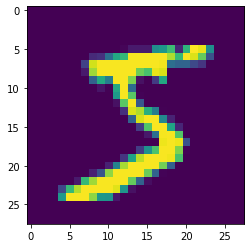

In [8]:
plt.imshow(x_train[0,:,:,0])

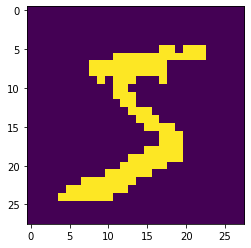

In [9]:
plt.imshow(y_train[0,:,:,0])

one hot

In [10]:
y_train2 = tf.one_hot(y_train, 2)
y_test2 = tf.one_hot(y_test, 2)
y_train2.shape, y_test2.shape

(TensorShape([Dimension(50), Dimension(28), Dimension(28), Dimension(1), Dimension(2)]),
 TensorShape([Dimension(10), Dimension(28), Dimension(28), Dimension(1), Dimension(2)]))

Session

In [11]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.keras.backend.set_session(tf.Session(config=config))

Model

In [12]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [13]:
def conv_block(input, filters):
    out = Conv2D(filters, kernel_size=(2,2), strides=1, padding='same')(input)
    out = BatchNormalization()(out)
    out = Activation('relu')(out)
#    out = Conv2D(filters, kernel_size=(3,3), strides=1, padding='same')(out)
#    out = BatchNormalization()(out)
#    out = Activation('relu')(out)
    return out

def CNN(nClasses, input_shape=(28, 28, 1)):
    inputs = Input(shape=input_shape)
    conv1 = conv_block(inputs, 4)
    conv2 = conv_block(conv1,  8)
    conv3 = conv_block(conv2, 16)
    conv4 = conv_block(conv3,  8)
    conv5 = conv_block(conv4,  4)
    out = Conv2D(nClasses, (3, 3), padding='same')(conv5)
    out = Activation('softmax')(out)
    out = tf.reshape( out, [-1, input_shape[0], input_shape[1], 1, nClasses] )
    model = Model(inputs=[inputs], outputs=[out])
    return model

model = CNN(2, x_train.shape[1:])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 4)         20        
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 4)         16        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         136       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0     

Before training

In [16]:
tmp = model.predict( x_test[0:5,:,:,:] )

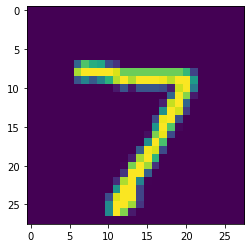

In [17]:
plt.imshow(x_test[0,:,:,0])

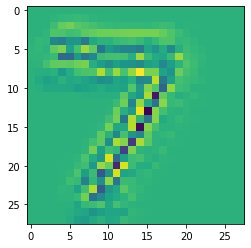

In [18]:
plt.imshow(tmp[0,:,:,0,1])

Train

In [19]:
model.fit( x=x_train, y=y_train2, batch_size=10, steps_per_epoch=n_train//10,
          epochs=30, verbose=1, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5 samples
Epoch 1/30
5/5 [==============================] - 1s 216ms/step - loss: 0.6397
Epoch 2/30
5/5 [==============================] - 0s 11ms/step - loss: 0.5687
Epoch 3/30
5/5 [==============================] - 0s 13ms/step - loss: 0.5173
Epoch 4/30
5/5 [==============================] - 0s 13ms/step - loss: 0.4697
Epoch 5/30
5/5 [==============================] - 0s 13ms/step - loss: 0.4280
Epoch 6/30
5/5 [==============================] - 0s 12ms/step - loss: 0.3920
Epoch 7/30
5/5 [==============================] - 0s 12ms/step - loss: 0.3597
Epoch 8/30
5/5 [==============================] - 0s 12ms/step - loss: 0.3302
Epoch 9/30
5/5 [==============================] - 0s 13ms/step - loss: 0.3034
Epoch 10/30
5/5 [==============================] - 0s 12ms/step - loss: 0.2797
Epoch 11/30
5/5 [==============================] - 0s 13ms/step - loss: 0.2586
Epoch 12/30
5/5 [=========

Test

In [20]:
tmp = model.predict( x_test[0:5,:,:,:] )

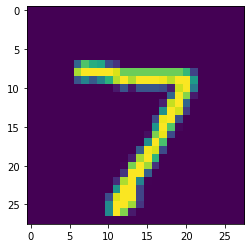

In [21]:
plt.imshow(x_test[0,:,:,0])

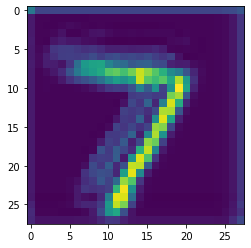

In [22]:
plt.imshow(tmp[0,:,:,0,1])

Train2

In [27]:
model.fit( x=x_train, y=y_train2, batch_size=10, steps_per_epoch=n_train//10,
          epochs=30, verbose=1, shuffle=True)

Train on 5 samples
Epoch 1/30
5/5 [==============================] - 0s 15ms/step - loss: 0.0619
Epoch 2/30
5/5 [==============================] - 0s 13ms/step - loss: 0.0596
Epoch 3/30
5/5 [==============================] - 0s 13ms/step - loss: 0.0574
Epoch 4/30
5/5 [==============================] - 0s 13ms/step - loss: 0.0555
Epoch 5/30
5/5 [==============================] - 0s 13ms/step - loss: 0.0536
Epoch 6/30
5/5 [==============================] - 0s 13ms/step - loss: 0.0519
Epoch 7/30
5/5 [==============================] - 0s 13ms/step - loss: 0.0503
Epoch 8/30
5/5 [==============================] - 0s 13ms/step - loss: 0.0489
Epoch 9/30
5/5 [==============================] - 0s 13ms/step - loss: 0.0475
Epoch 10/30
5/5 [==============================] - 0s 13ms/step - loss: 0.0462
Epoch 11/30
5/5 [==============================] - 0s 12ms/step - loss: 0.0449
Epoch 12/30
5/5 [==============================] - 0s 13ms/step - loss: 0.0438
Epoch 13/30
5/5 [=========================

Test2

In [28]:
tmp = model.predict( x_test[0:5,:,:,:] )

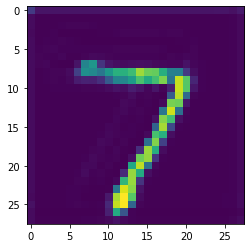

In [29]:
plt.imshow(tmp[0,:,:,0,1])